Q3. Does applicant income show diminishing returns on loan amount approved?


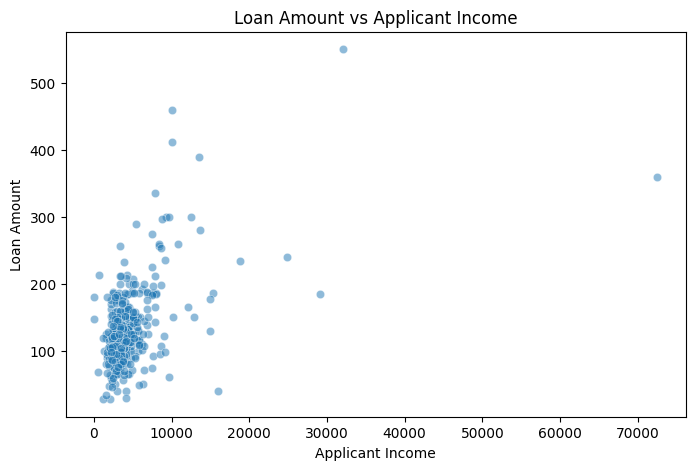

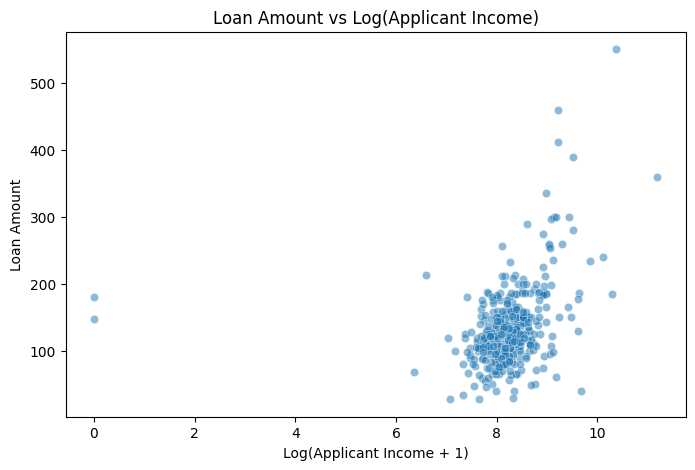

Pearson correlation (ApplicantIncome vs LoanAmount): 0.493
Pearson correlation (log(ApplicantIncome) vs LoanAmount): 0.321
Regression coefficients:
 ApplicantIncome: 0.011836, ApplicantIncome_squared: -0.000000110
Intercept: 84.85
Negative coefficient for squared term indicates diminishing returns effect.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data
df = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")  # or your dataset path

# Drop missing values in relevant columns
df = df.dropna(subset=['ApplicantIncome', 'LoanAmount'])

# Scatter plot: raw
plt.figure(figsize=(8,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, alpha=0.5)
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# Scatter plot: log scale for income
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(df['ApplicantIncome']), y='LoanAmount', data=df, alpha=0.5)
plt.title('Loan Amount vs Log(Applicant Income)')
plt.xlabel('Log(Applicant Income + 1)')
plt.ylabel('Loan Amount')
plt.show()

# Correlations
corr_raw, _ = pearsonr(df['ApplicantIncome'], df['LoanAmount'])
corr_log, _ = pearsonr(np.log1p(df['ApplicantIncome']), df['LoanAmount'])
print(f"Pearson correlation (ApplicantIncome vs LoanAmount): {corr_raw:.3f}")
print(f"Pearson correlation (log(ApplicantIncome) vs LoanAmount): {corr_log:.3f}")

# Optional: Quadratic regression to check diminishing returns
from sklearn.linear_model import LinearRegression

X = df[['ApplicantIncome']].copy()
X['ApplicantIncome_squared'] = X['ApplicantIncome']**2
y = df['LoanAmount']

model = LinearRegression()
model.fit(X, y)

print(f"Regression coefficients:\n ApplicantIncome: {model.coef_[0]:.6f}, ApplicantIncome_squared: {model.coef_[1]:.9f}")
print(f"Intercept: {model.intercept_:.2f}")

# Interpretation:
if model.coef_[1] < 0:
    print("Negative coefficient for squared term indicates diminishing returns effect.")
else:
    print("Squared term positive or zero, no evidence of diminishing returns.")


The scatter plots show how loan amount changes with income and log(income).

Higher correlation with log(income) than raw income suggests diminishing returns.

The quadratic regression tests if the squared term is negative (which signals diminishing returns).